In [6]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

 #--- Check if this is the instructor's repo instead of student's fork ---
 #This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/Final-Exam"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")


✅ Already inside repo folder: /content/STAT-7220-Applied-Experimental-Design
⚠️ WARNING: You are working in the instructor's repo, not your fork!
💡 Please fork the repo to your own account and update `github_username` above.
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/Final-Exam


# STAT 7220 - Final Exam
## Factorial Designs
## Dr. Austin Brown
## Due Date: December 12, 2025

## Part 1 Instructions:
Let's say you own a new food truck called **Buster's Breakfast Burritos**. To determine the best ingredients for your burritos, and as a means of minimizing food (and money) waste, you decide to conduct an experiment. Specifically, you want to investigate the following treatments:

| Factor   | Levels                  |
|:---------|:------------------------|
| Protein  | Bacon, Sausage, Chorizo |
| Salsa    | Mild, Hot               |
| Potatoes | Yes, No                 |

To gather data for this experiment, you recruit $r=5$ local residents for each of the $3\times 2\times 2=12$ treatment combinations. After each participant has tasted their randomly assigned burrito, you ask them to rate the burrito on a scale of 1 to 10 (1 = terrible, 10 = amazing). The data are stored in the file `Busters Burritos.xlsx` in the assignment repo. With these data, I want you to:

1. Briefly state the objective of the experiment.

The objective is to determine how the type of protein (bacon, sausage, chorizo), salsa (mild vs. hot), and having potatoes or not affect customers’ ratings of Buster’s Breakfast Burritos, so that the truck can minimize food waste.

2. State the outcome variable and how it was measured.

Outcome variable: Burrito rating.

Measurement: Each customer rated their burrito on a numerical scale from 1 to 10, where 1 = terrible and 10 = amazing.

3. State the main effects. What lurking variables may be present?

Main effects being studied:

- Type of Protein (A)
- Type of Salsa (B)
- Potato, yes or no. (C)

Lurking Variables:
- Differences in preperation
- Taste preference

4. Why might a full factorial design be preferred here to a $2^k$ fractional factorial design?

A full factorial design involves testing all possible combinations of levels for all factors, so I am able to estimate all main effects and all interactions.

A $2^k$ fractional factorial design is designed for two-level factors and would not be able to handle the three-level protein factor.


5. State all sets of statistical hypotheses.

Main effect of protein (3 levels: bacon, sausage, chorizo):

- H0:μbacon = μsausage = μchorizo

- Ha: Not all protein means are equal.

Main effect of salsa (2 levels: mild, hot)

- H0:μmild = μspicy

- Ha: mild and spicy are not equal

Main effect of potatoes (2 levels: yes, no)

- H0:μpotatoes(yes) = μpotatoes(no)

- Ha: potatoes(yes) not equal to potatoes(no)

Overall treatment (12 combinations):

- H0: All 12 combinations are equal

- Ha: Atleast one treatment is different

6. Perform appropriate exploratory/descriptive analysis including summary statistics and appropriate visualizations. Do these analyses provide any support for the hypotheses? Briefly explain.


In [7]:
## Question 6 Code ##

## Import pandas library ##
import pandas as pd

## Import File ##

burritos = pd.read_excel("Busters Burritos.xlsx")

## Data Integrity Check ##

print(burritos.info())

## Calculate Means & SDs of Protein Type ##

protein_stats = burritos.groupby("Protein")['Satisfaction'].agg(['mean','std'])

print(protein_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Protein       60 non-null     object 
 1   Salsa         60 non-null     object 
 2   Potatoes      60 non-null     object 
 3   Satisfaction  60 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.0+ KB
None
         mean       std
Protein                
Bacon    6.49  1.046749
Chorizo  6.74  1.106155
Sausage  5.82  1.058599


 - There is not a huge difference in satisfaction between protein types, but there is a difference so here we would support the alternative hypothesis for this effect. Chorizo would be the preferred choice.

In [9]:
## Means and Standard Deviations for Salsa Type ##

salsa_stats = burritos.groupby("Salsa")["Satisfaction"].agg(['mean','std'])

print(salsa_stats)

           mean       std
Salsa                    
Hot    6.073333  1.240393
Mild   6.626667  0.932159


- Again there is not a huge difference in satisfaction between salsa type, but there is a difference so we would also support the alternative hypothesis for this effect. Mild salsa would be the preferred choice.

In [10]:
## Means and Standard Deviations for Potatoes  ##

potatoes_stats = burritos.groupby("Potatoes")["Satisfaction"].agg(['mean','std'])

print(potatoes_stats)

          mean       std
Potatoes                
No        6.11  1.075864
Yes       6.59  1.135432


- There is not a huge difference in satisfaction between having potatoes and not having them, but there is a difference so we would also support the alternative hypothesis for this effect. No potatoes would be the preferred choice.

In [13]:
## Interaction Effect Summary Stats ##

int_stats = burritos.groupby(['Protein','Salsa', 'Potatoes'])['Satisfaction'].agg(['mean','std'])

print(int_stats)

                        mean       std
Protein Salsa Potatoes                
Bacon   Hot   No        5.86  1.335290
              Yes       6.46  0.397492
        Mild  No        6.70  0.418330
              Yes       6.94  1.510960
Chorizo Hot   No        6.34  0.610737
              Yes       6.82  2.104044
        Mild  No        7.04  0.507937
              Yes       6.76  0.658027
Sausage Hot   No        4.98  1.211198
              Yes       5.98  0.641872
        Mild  No        5.74  0.952890
              Yes       6.58  0.944458


- Chorizo x Mild Salsa x No potatoes has the highest overall satisfaction level but again there is not much of a difference between combinations. The differences are very small.

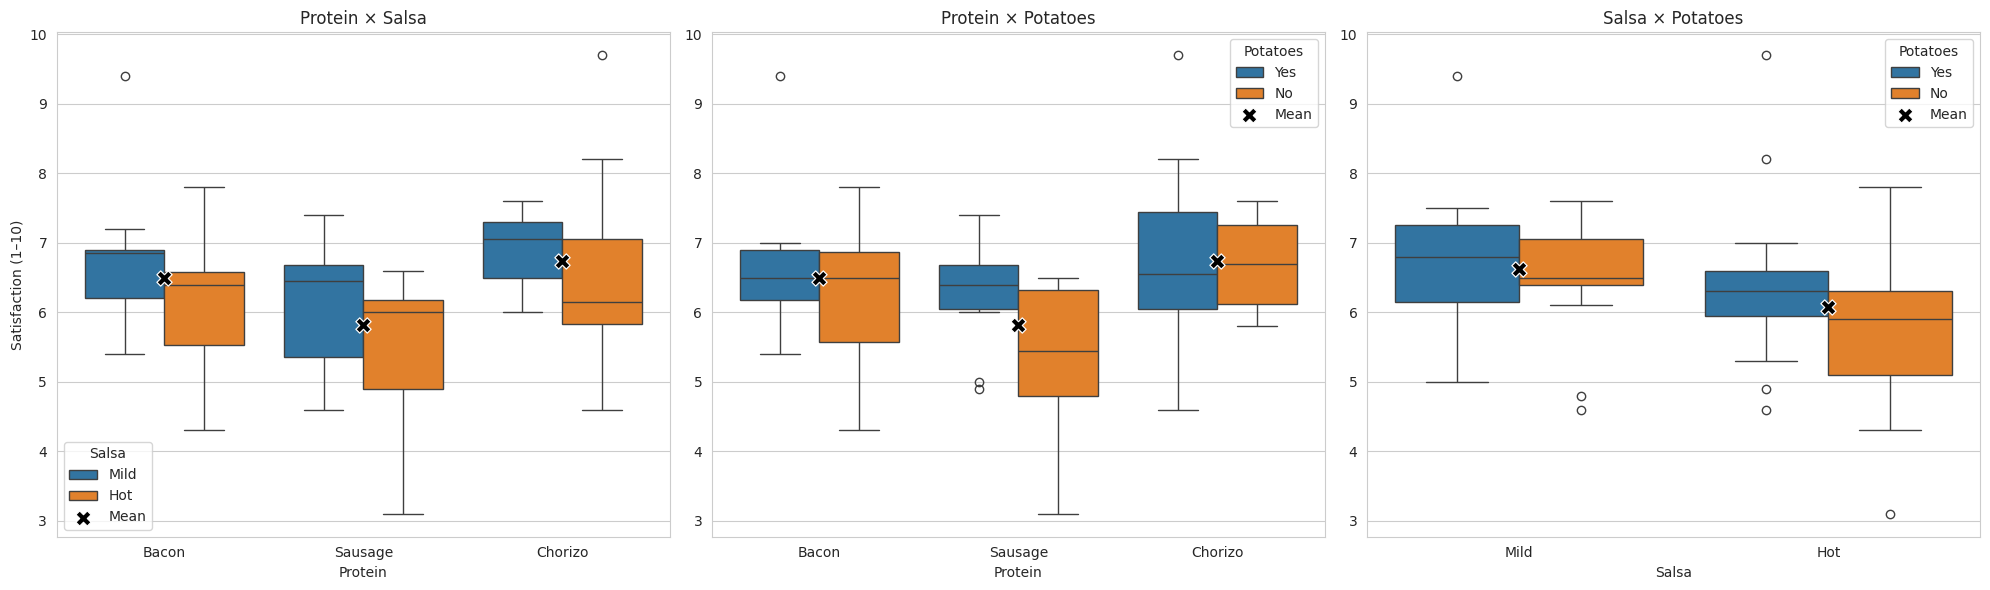

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# plot means
# -----------------------------
def add_means(ax, group_var):
    mean_df = burritos.groupby(group_var)['Satisfaction'].mean().reset_index()
    sns.scatterplot(
        data=mean_df,
        x=group_var,
        y='Satisfaction',
        marker='X',
        s=120,
        color='black',
        ax=ax,
        zorder=5,
        label='Mean'
    )

# Plot 1: Protein × Salsa

sns.boxplot(
    data=burritos,
    x='Protein',
    y='Satisfaction',
    hue='Salsa',
    ax=axes[0]
)
add_means(axes[0], 'Protein')
axes[0].set_title('Protein × Salsa')
axes[0].set_xlabel('Protein')
axes[0].set_ylabel('Satisfaction (1–10)')
axes[0].legend(title='Salsa')

# Plot 2: Protein × Potatoes

sns.boxplot(
    data=burritos,
    x='Protein',
    y='Satisfaction',
    hue='Potatoes',
    ax=axes[1]
)
add_means(axes[1], 'Protein')
axes[1].set_title('Protein × Potatoes')
axes[1].set_xlabel('Protein')
axes[1].set_ylabel('')
axes[1].legend(title='Potatoes')


# Plot 3: Salsa × Potatoes

sns.boxplot(
    data=burritos,
    x='Salsa',
    y='Satisfaction',
    hue='Potatoes',
    ax=axes[2]
)
add_means(axes[2], 'Salsa')
axes[2].set_title('Salsa × Potatoes')
axes[2].set_xlabel('Salsa')
axes[2].set_ylabel('')
axes[2].legend(title='Potatoes')

plt.tight_layout()
plt.show()


7. Fit the full factorial ANOVA model. Check the assumption of normality using a testing method and a visual method. Does the assumption hold? Why or why not?

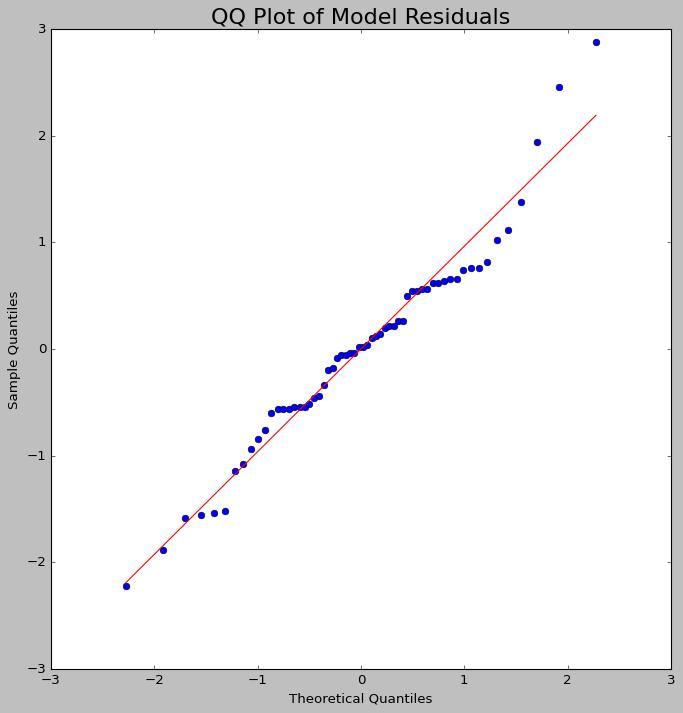


Shapiro-Wilk Test for Normality:
ShapiroResult(statistic=np.float64(0.9693192084188245), pvalue=np.float64(0.13513593912584776))


In [22]:
## Question 7 Code ##

## Import relevant statsmodels and scipy functions ##
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
import seaborn as sns

## Fit the ANOVA Model ##
mod = ols('Satisfaction ~ Protein * Salsa * Potatoes', data=burritos).fit()

## NORMALITY ASSUMPTION

## Extract Model Residuals ##
residuals = mod.resid

## QQ-Plot ##
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

stats.probplot(residuals, plot=plt)
ax.set_title("QQ Plot of Model Residuals", fontsize=20)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

## Shapiro-Wilk Test ##
print("\nShapiro-Wilk Test for Normality:")
print(stats.shapiro(residuals))



- **Normality Assumption**: The points in the QQ-plot show almost no deviation except for around the tail but it is not much, which gives strong evidence for the normality assumption being reasonable. This is also observed in the Shapiro-Wilk test result ince p > 0.05, which gives us strong evidence in favor of the null hypothesis of normality. So in sum, the normality assumption seems reasonably met.

8. Check the assumption of constant variance using a testing method and a visual method. Does the assumption hold? Why or why not?

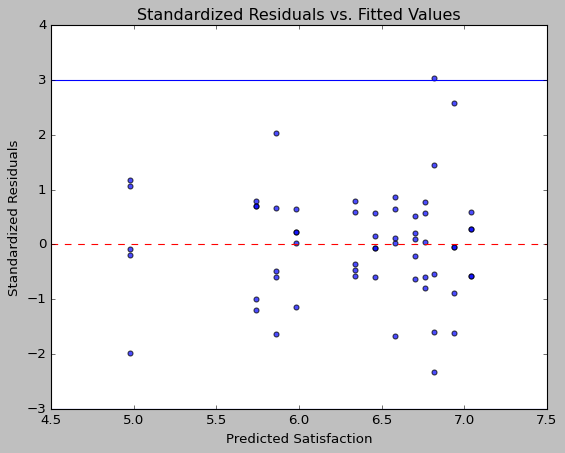


Breusch-Pagan Test for Heteroscedasticity:
F-statistic: 2.6325727905085836
F p-value: 0.010233827998010574


In [23]:
## Question 8 Code ##

## CONSTANT VARIANCE

## Obtain Standardized Residuals ##
standardized_residuals = mod.get_influence().resid_studentized_internal

## Get Fitted Values ##
fitted_values = mod.fittedvalues

## Residuals vs Fitted Plot ##
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, standardized_residuals, alpha=0.7)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted Satisfaction")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

## BREUSCH–PAGAN TEST

bp_test = het_breuschpagan(residuals, mod.model.exog)

f_statistic = bp_test[2]
f_p_value   = bp_test[3]

print("\nBreusch-Pagan Test for Heteroscedasticity:")
print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")


**Constant Variance Assumption**: The points in the scatterplot are generally scattered randomly about zero. But the p value is below .05. Therefore, we reject the null hypothesis of constant variance.

9. Report the ANOVA table. What statistical conclusions can we draw about our main effects and interaction effects?

In [24]:
## Question 9 Code ##

## Print ANOVA Table ##

print(sm.stats.anova_lm(mod,typ=3)) # We generally use Type 3 SS with interactions

                            sum_sq    df           F        PR(>F)
Intercept               171.698000   1.0  151.844351  1.774939e-16
Protein                   4.757333   2.0    2.103619  1.331229e-01
Salsa                     1.764000   1.0    1.560027  2.177184e-01
Potatoes                  0.900000   1.0    0.795932  3.767632e-01
Protein:Salsa             0.024667   2.0    0.010907  9.891545e-01
Protein:Potatoes          0.370667   2.0    0.163903  8.492974e-01
Salsa:Potatoes            0.162000   1.0    0.143268  7.067228e-01
Protein:Salsa:Potatoes    0.233333   2.0    0.103176  9.021674e-01
Residual                 54.276000  48.0         NaN           NaN


Effect of Protein

F(2,48) = 2.10, p = 0.1331
- Protein type does not have a statistically meaningful effect on Satisfaction.

Effect of Salsa
F(1,48) = 1.50, p = 0.2177
- Salsa level does not have a statistically meaningful effect on Satisfaction.

Effect of Potatoes
F(1,48) = 0.80, p = 0.3676
- Including potatoes does not have a statistically meaningful effect on Satisfaction.

Three-Way Interaction: Protein × Salsa × Potatoes
- F(2,48) = 0.10 with a corresponding p = 0.9013.
This indicates that our data strongly support the null hypothesis that the three-way interaction effect is not meaningfully different from zero.

Based on the results of this factorial ANOVA, we do not find evidence that any of the ingredients—Protein type, Salsa heat level, or the inclusion of Potatoes—produced statistically meaningful differences in customer Satisfaction.

10. If the interactions and/or main effects were found to be statistically meaningful, conduct appropriate post-hoc tests. Report the results of these tests and any conclusions you can draw from them. If the interactions and/or main effects were not found to be statistically meaningful, explain why post-hoc tests would not be appropriate.

Since none of the interaction terms and none of the main effects in our ANOVA were found to be statistically meaningful, it would not be appropriate to run post-hoc tests.

11. Calculate and interpret partial $\eta^2$ for the main effects.

In [26]:
## Question 11 Code ##


!pip install pingouin

## Load pingouin ##
import pingouin as pg

## Fit 3-way ANOVA with pingouin ##
burrito_mod_p = pg.anova(
    dv='Satisfaction',
    between=['Protein', 'Salsa', 'Potatoes'],
    effsize='np2',
    data=burritos
).round(4)

## Print only Source and partial eta squared ##
print(burrito_mod_p[['Source', 'np2']])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.0 MB/s eta 0:00:00
                       Source     np2
0                     Protein  0.1429
1                       Salsa  0.0780
2                    Potatoes  0.0599
3             Protein * Salsa  0.0075
4          Protein * Potatoes  0.0305
5            Salsa * Potatoes  0.0124
6  Protein * Salsa * Potatoes  0.0043
7                    Residual     NaN


- The main effects have larger effects apart than they do when they interact.


12. Give an overall conclusion for the experiment. Which burrito combination(s) should you include on your menu regularly? What are the limitations of your experiment? How could you improve it in the future?

Based on the results of the three-way factorial ANOVA, none of the main effect —Protein, Salsa, or Potatoes were found to have statistically meaningful impacts on customer Satisfaction. To improve the experiment in the future, we could expand the sample size and recruit a more diverse group of participants.



## Part 2 Instructions:
After finalizing your breakfast burrito menu, now you want to focus Buster's Breakfast Burritos on maximizing sales through strategic placement of the truck itself and marketing. Obviously there are a lot of factors at play, so you decide to focus your attention on three: **Location** (could set up at a local brewery or at a local university); **Timing** (weekday or weekend); and **Marketing** (independently or in partnership with the brewery/university). See the below table:

| Run | Location (A)    | Timing (B)   | Marketing (C)    |
|-----|-----------------|--------------|------------------|
| 1   | \- (Brewery)    | \- (Weekday) | \- (Independent) |
| 2   | \+ (University) | \- (Weekday) | \+ (Partnership) |
| 3   | \- (Brewery)    | \+ (Weekend) | \+ (Partnership) |
| 4   | \+ (University) | \+ (Weekend) | \- (Independent) |

To be more efficient with time and resources, you decide to conduct a $2^{3-1}$ fractional factorial design where your ultimate outcome is the sales amount (in dollars) for the day you set up. For each of the above runs, you will set up your truck $r=2$ times and record the sales amount. The data are stored in the `Busters Burrito Sales.xlsx` file in our course repo. With these day, I want you to:

1. Briefly describe the objective of the experiment.

The objective is to determine how Location, Timing, and Marketing strategy  affect daily sales revenue for Buster’s Breakfast Burritos. The goal is to identify which combination(s) of these factors lead to the highest sales.

2. Specify the outcome variable and how it is measured.

Outcome variable:
- Daily sales amount for the truck.

Measurement:
- For each run, total dollar sales for that day are recorded in dollars

3. Specify the independent variables. What lurking variables may be present?

Independent variables (factors):

Location (A):
- Brewery
- University

Timing (B):
- Weekday
- Weekend

Marketing (C):
- Independent
- Partnership

Possible lurking variables:
- Weather conditions
- Competiton

4. Explain why a fractional design is appropriate here. What are the advantages and disadvantages of using a fractional design?

Fractional design provides better efficiency. Because we have three two-level factors A fractional factorial reduces the number of days data is collected.

5. State the sets of null and alternative hypotheses for this experiment.

𝐻01 ∶ 𝜇𝐴− = 𝜇𝐴+

𝐻11 ∶ 𝜇𝐴− ≠ 𝜇𝐴+

𝐻02 ∶ 𝜇𝐵− = 𝜇𝐵+

𝐻12 ∶ 𝜇𝐵− ≠ 𝜇𝐵

𝐻03 ∶ 𝜇𝐶− = 𝜇𝐶+

𝐻13 ∶ 𝜇𝐶− ≠ 𝜇𝐶+


6. Perform appropriate exploratory/descriptive analysis including summary statistics and appropriate visualizations. Do these analyses provide any support for the hypotheses? Briefly explain.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   16 non-null     object 
 1   Timing     16 non-null     object 
 2   Marketing  16 non-null     object 
 3   Sales      16 non-null     float64
dtypes: float64(1), object(3)
memory usage: 644.0+ bytes
None
     Location   Timing    Marketing    Sales
0     Brewery  Weekday  Independent   767.87
1     Brewery  Weekday  Independent   875.14
2  University  Weekday  Independent   865.84
3  University  Weekday  Independent   544.24
4     Brewery  Weekend  Independent  1055.34

Summary Statistics for Main Effects:

Location:
     Location      mean         std
0     Brewery  1108.675  224.129011
1  University   991.610  254.431780

Timing:
    Timing        mean         std
0  Weekday   878.39625  173.385636
1  Weekend  1221.88875  159.111741

Marketing:
     Marketing        mean         std
0  I

/tmp/ipython-input-954472131.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-954472131.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-954472131.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


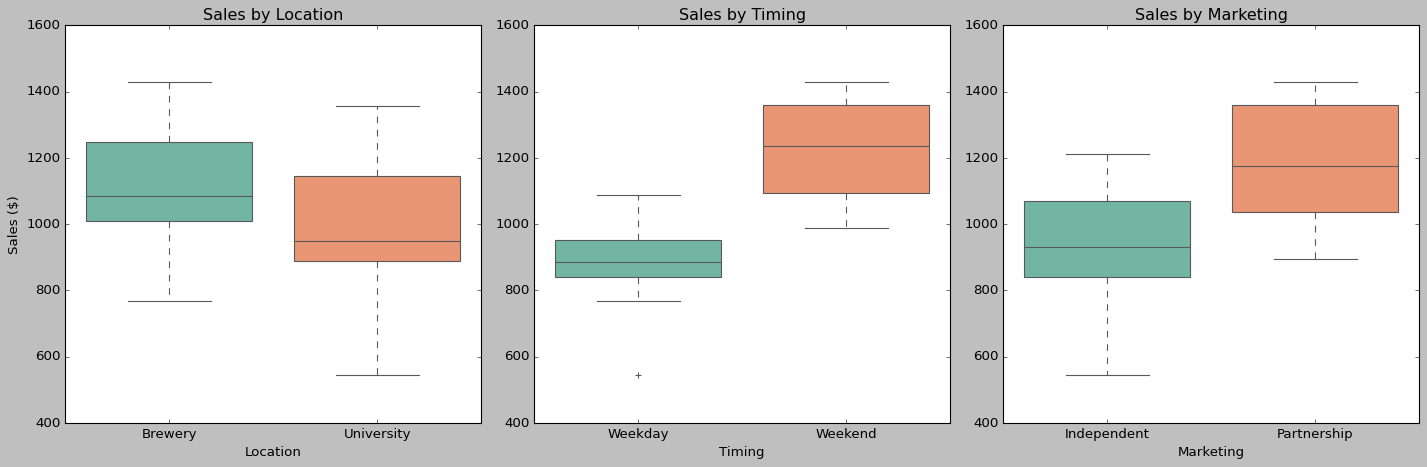

In [28]:
## Question 6 Code ##

## Load Packages ##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data ##
sales = pd.read_excel("Busters Burrito Sales.xlsx")

## Evaluate Data Integrity ##
print(sales.info())
print(sales.head())

## Calculate and Row-Bind Summary Statistics
## for the Main Effects ##

def summary_stats(data, factor):
    return (
        data
        .groupby(factor)['Sales']
        .agg(['mean', 'std'])
        .reset_index()
    )

loc_stats   = summary_stats(sales, 'Location')
time_stats  = summary_stats(sales, 'Timing')
mkt_stats   = summary_stats(sales, 'Marketing')

print("\nSummary Statistics for Main Effects:\n")
print("Location:")
print(loc_stats)
print("\nTiming:")
print(time_stats)
print("\nMarketing:")
print(mkt_stats)

## Produce Individual Boxplots for Each Factor ##

factors = ['Location', 'Timing', 'Marketing']

plt.figure(figsize=(18, 6))

for i, factor in enumerate(factors, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=sales,
        x=factor,
        y='Sales',
        palette='Set2'
    )
    plt.title(f"Sales by {factor}")
    plt.xlabel(factor)
    plt.ylabel('Sales ($)' if i == 1 else "")  # only left plot gets y-label

plt.tight_layout()
plt.show()


- Location: The brewery tends to have slightly higher sales, but the two groups still overlap a lot. Location does not appear to have a strong effect on sales.

- Timing: Weekend sales are noticeably higher than weekday sales, and the difference is about 1 standard deviation.

- Marketing: Sales are clearly higher when the truck partners with the brewery or university. The boxplots show only small overlap between the two groups.



7. Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

In words, the defining relation of 𝐼 = 𝐴𝐵𝐶 indicates that our main effects are aliased with the two-way interactions. This means that when we estimate the main effect of a factor (Location), we are actually estimating the combined effect of that main effect and theinteraction effect of the other two factors (Timing and MArketing).  effect and the
interaction effect of the other two factors (e.g., Battery Life and Display). Therefore, anyconclusions drawn about the main effects must be interpreted with caution, as they may be confounded with the corresponding two-way interactions

8. Fit the appropriate ANOVA model to the data. Assess the normality assumption using two methods. Do we have evidence to support the assumption of normality? Why or why not?

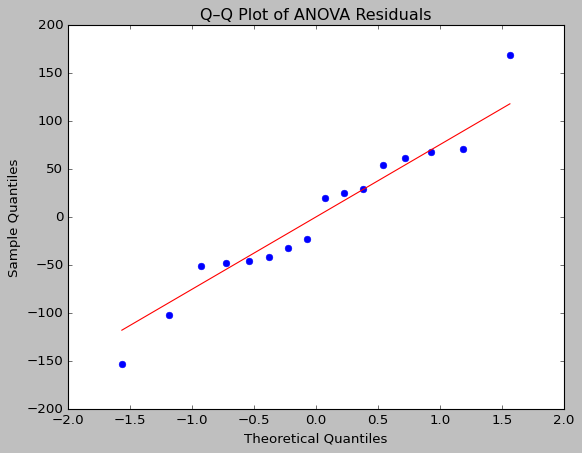

Shapiro–Wilk Test: W=0.9685567407780465, p-value=0.8147214811761188
Normality Assumption Valid: True


In [29]:
## Question 8 Code ##


## Fit Main Effects Model ##
mod_sales = ols('Sales ~ Location + Timing + Marketing', data=sales).fit()

## Evaluate Normality ##

## Q–Q Plot ##
sm.qqplot(mod_sales.resid, line='s')
plt.title('Q–Q Plot of ANOVA Residuals')
plt.show()

## Shapiro–Wilk Test ##
shapiro_test_sales = stats.shapiro(mod_sales.resid)

print(f"Shapiro–Wilk Test: W={shapiro_test_sales.statistic}, "
      f"p-value={shapiro_test_sales.pvalue}")

print(f"Normality Assumption Valid: {shapiro_test_sales.pvalue > 0.05}")


The Q–Q plot shows that the residual points fall reasonably close to the red reference line, with only small deviations at the tails. This suggests that the residuals follow a roughly normal distribution. Since p > 0.05, we fail to reject the null hypothesis of normality.

9. Assess the constant variance assumption using two methods. Do we have evidence to support the assumption of constant variance? Why or why not?

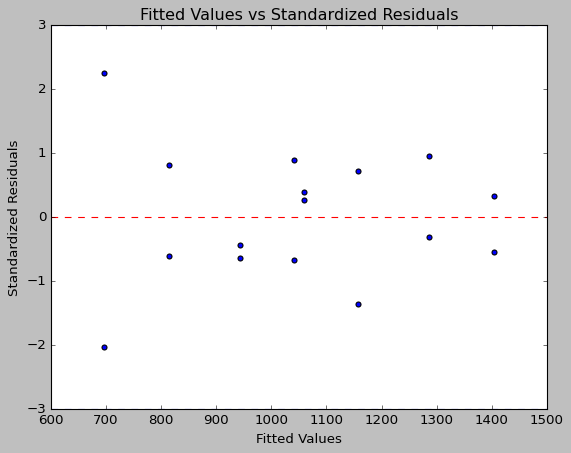

Breusch–Pagan Test: F-statistic=3.261918353824198, p-value=0.05939124011896124
Homoscedasticity Assumption Valid: True


In [30]:
## Question 9 Code ##


## Scatterplot of Fitted Values vs Standardized Residuals ##

fitted_vals_sales = mod_sales.fittedvalues
standardized_resid_sales = mod_sales.get_influence().resid_studentized_internal

plt.scatter(fitted_vals_sales, standardized_resid_sales)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='blue', linestyle='--')
plt.axhline(y=-3, color='blue', linestyle='--')
plt.title('Fitted Values vs Standardized Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

## Breusch–Pagan Test ##

bp_test_sales = het_breuschpagan(mod_sales.resid, mod_sales.model.exog)

print(f'Breusch–Pagan Test: F-statistic={bp_test_sales[2]}, p-value={bp_test_sales[3]}')
print(f'Homoscedasticity Assumption Valid: {bp_test_sales[3] > 0.05}')


 In the scatterplot comparing the fitted values to the standardized residuals, we can see
- No residuals have a value greater than +3 or less than-3.
- The residuals appear to be randomly and evenly scattered around the horizontal
line at 0, indicating that 0 is a reasonable estimate for the mean of the residuals.
- The heights of the vertical lines representing each group’s variance are mostly thesame length, with only minor variations. This visual inspection suggests that the constant variance assumption is reasonably met.

Since this p-value is greater thanthe common alpha level of 0.05, we fail to reject the null hypothesis that the variances areequal across groups.

10. Report and interpret the ANOVA table. What conclusions can we draw about our main effects? Do the results of these analyses support the null or alternative hypotheses more strongly?

In [31]:
## Question 10 Code ##



print("\nANOVA Table:")

anova_table_sales = sm.stats.anova_lm(mod_sales, typ=1)

## Add a 'Significant' column ##
anova_table_sales['Significant'] = anova_table_sales['PR(>F)'] < 0.05

print(anova_table_sales)



ANOVA Table:
             df         sum_sq        mean_sq          F    PR(>F)  \
Location    1.0   54816.856900   54816.856900   7.241570  0.019633   
Timing      1.0  471948.390225  471948.390225  62.346647  0.000004   
Marketing   1.0  242000.044225  242000.044225  31.969367  0.000107   
Residual   12.0   90836.972950    7569.747746        NaN       NaN   

           Significant  
Location          True  
Timing            True  
Marketing         True  
Residual         False  


 - All three main effects Location, Timing, and Marketing are statistically significant at the 0.05 level. The statistical significance across all three factors shows that the alternative hypotheses are supported more strongly than the null hypotheses.

11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?

In [32]:
## Question 11 Code ##


import numpy as np
import pandas as pd

## Add Effect column to sales dataframe ##
## (A = Location, B = Timing, C = Marketing; generator C = AB)
## Order of runs matches your design table:
## 1: (- - -)  -> C
## 2: (- + +)  -> A
## 3: (+ - +)  -> B
## 4: (+ + -)  -> ABC
sales['Effect'] = np.repeat(["C", "A", "B", "ABC"], repeats=2)

## Group by Effect and compute mean Sales ##
df = (
    sales
    .groupby('Effect', as_index=False)['Sales']
    .mean()
)

## Pivot so each effect is a separate column ##
df = df.pivot_table(index=None, columns='Effect', values='Sales').reset_index(drop=True)

## Extract factor columns for easier use ##
A   = df['A']     # Location
B   = df['B']     # Timing
C   = df['C']     # Marketing
ABC = df['ABC']   # Alias term

## Compute factor effect estimates ##
effects = pd.DataFrame({
    'Location (A)':   0.5 * (A - B - C + ABC),
    'Timing (B)':     0.5 * (-A + B - C + ABC),
    'Marketing (C)':  0.5 * (-A - B + C + ABC)
})

print(effects.T)


ValueError: Length of values (8) does not match length of index (16)

12. Calculate and interpret the partial $\eta^2$ for the main effects. Which effects seem more important? Why?

In [ ]:
## Question 12 Code ##

13. Give an overall conclusion for the experiment. Which location, timing, and marketing combination(s) should you use to maximize sales? What are the limitations of your experiment? How could you improve it in the future?

## Part 3 Instructions:

Please briefly repond to the following questions:

1. How do we de-alias the main effects and interactions in a fractional factorial design? Why is this important? Why may it not always be feasible?

2. In all of our assignments, I have had you specify/consider a lot of characteristics of an experiment before getting into the analysis. Why is this good practice?

3.  What is the most important thing you learned in this class?